1. 加载库，加载数据集，拆分为训练集和测试集

In [1]:
from __future__ import print_function
import keras
from keras.datasets import cifar100
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

Using TensorFlow backend.


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


2. 图片数据样例

x_shape:  (32, 32, 3)
x_sample:  [[[ 45  32  49]
  [ 44  31  48]
  [ 43  31  47]
  ...
  [ 43  32  51]
  [ 44  33  53]
  [ 43  33  52]]

 [[ 39  32  47]
  [ 37  31  45]
  [ 38  31  46]
  ...
  [ 35  31  48]
  [ 37  33  50]
  [ 35  32  49]]

 [[ 38  33  47]
  [ 36  31  45]
  [ 38  32  46]
  ...
  [ 40  28  48]
  [ 41  29  49]
  [ 40  28  48]]

 ...

 [[ 50  37  53]
  [ 50  37  56]
  [ 52  39  59]
  ...
  [106  84  67]
  [ 95  71  60]
  [ 94  69  63]]

 [[ 55  39  55]
  [ 57  41  57]
  [ 57  41  59]
  ...
  [ 88  60  52]
  [112  84  67]
  [ 94  66  54]]

 [[ 60  49  57]
  [ 58  47  54]
  [ 54  44  51]
  ...
  [ 62  43  49]
  [102  82  61]
  [120 101  76]]]
y_sample:  [42]
y_#987 looks like: 


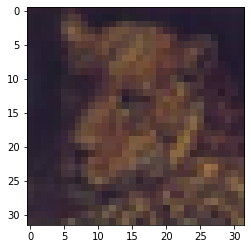

In [5]:
## Each image is a 32 x 32 x 3 numpy array
sample_index = 987
print("x_shape: ", x_train[sample_index].shape)
print("x_sample: ", x_train[sample_index])
print("y_sample: ", y_train[sample_index])
print("y_#%d looks like: " % sample_index)
plt.imshow(x_train[sample_index]);

3. 将y转换为one-hot向量表示

In [6]:
num_classes = 100
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
y_train[sample_index]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)

4. 将x中的数值转化为float，同时将RGB做min-max标准化

In [ ]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

5. 构建卷积神经网路
    <ul>
    <li>- Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification</li>
    <li>- 所有的卷积层的步幅都为1。</li>
    </ul>
    <br/>

In [8]:
# Let's build a CNN using Keras' Sequential capabilities

model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 64)       

5. 开始训练

In [10]:
# initiate RMSprop optimizer
opt = keras.optimizers.rmsprop(lr=0.001)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model.fit(x_train, y_train,
              batch_size=64,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 163s 3ms/step - loss: 4.6720 - accuracy: 0.0279 - val_loss: 4.2873 - val_accuracy: 0.0630
Epoch 2/5
50000/50000 [==============================] - 160s 3ms/step - loss: 4.0650 - accuracy: 0.0882 - val_loss: 3.9341 - val_accuracy: 0.1118
Epoch 3/5
50000/50000 [==============================] - 159s 3ms/step - loss: 3.7029 - accuracy: 0.1408 - val_loss: 3.4187 - val_accuracy: 0.1877
Epoch 4/5
50000/50000 [==============================] - 160s 3ms/step - loss: 3.4936 - accuracy: 0.1755 - val_loss: 3.3013 - val_accuracy: 0.2231
Epoch 5/5
50000/50000 [==============================] - 163s 3ms/step - loss: 3.3645 - accuracy: 0.1978 - val_loss: 3.1998 - val_accuracy: 0.2338
